# Extract Data from Source

In [1]:
## Extracting Traffic Crash Data from Source

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import numpy as np

In [3]:
traffic_Crash_Filename = 'Traffic_Crashes_-_Crashes.csv'

In [4]:
traffic_crash_url = 'https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD'
traffic_crash = request.urlretrieve(traffic_crash_url, filename=traffic_Crash_Filename)

In [5]:
traffic_crash = pd.read_csv(traffic_Crash_Filename)

In [6]:
traffic_crash.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [7]:
traffic_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785871 entries, 0 to 785870
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                785871 non-null  object 
 1   CRASH_DATE_EST_I               58982 non-null   object 
 2   CRASH_DATE                     785871 non-null  object 
 3   POSTED_SPEED_LIMIT             785871 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         785871 non-null  object 
 5   DEVICE_CONDITION               785871 non-null  object 
 6   WEATHER_CONDITION              785871 non-null  object 
 7   LIGHTING_CONDITION             785871 non-null  object 
 8   FIRST_CRASH_TYPE               785871 non-null  object 
 9   TRAFFICWAY_TYPE                785871 non-null  object 
 10  LANE_CNT                       199006 non-null  float64
 11  ALIGNMENT                      785871 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [8]:
traffic_crash.rename(columns={'ROADWAY_SURFACE_COND':'ROADWAY_SURFACE_CONDITION', 'LIGHTING_CONDITION':'ROAD_LIGHTING_CONDITION'}, inplace=True)

# Correlation between variables

In [9]:
traffic_crash.corr(numeric_only=True)

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
POSTED_SPEED_LIMIT,1.000000,0.000979,-0.020166,-0.035325,0.047887,0.076913,0.007482,0.029210,0.059106,0.042204,0.101531,NaN,0.014705,0.008068,0.011243,-0.003432,0.006607
LANE_CNT,0.000979,1.000000,-0.000889,0.003390,-0.000278,-0.001129,-0.000102,-0.000415,-0.000838,-0.000672,-0.001819,NaN,0.000268,0.002889,-0.001943,0.000833,0.000092
STREET_NO,-0.020166,-0.000889,1.000000,-0.008524,0.006966,0.010731,0.006539,0.004025,0.008297,0.005201,-0.038068,NaN,-0.000665,-0.008062,-0.000322,-0.073449,-0.011180
BEAT_OF_OCCURRENCE,-0.035325,0.003390,-0.008524,1.000000,0.021732,-0.038485,-0.007875,-0.014791,-0.031768,-0.017630,-0.009356,NaN,0.006709,0.003511,0.001949,0.152612,-0.042156
NUM_UNITS,0.047887,-0.000278,0.006966,0.021732,1.000000,0.108216,0.008663,0.038719,0.083469,0.060433,0.170186,NaN,0.004957,0.001057,0.010438,0.003282,-0.002476
INJURIES_TOTAL,0.076913,-0.001129,0.010731,-0.038485,0.108216,1.000000,0.098728,0.340458,0.767638,0.570192,-0.183008,NaN,0.002520,-0.004738,0.012856,-0.015551,0.005479
INJURIES_FATAL,0.007482,-0.000102,0.006539,-0.007875,0.008663,0.098728,1.000000,0.046279,0.022817,0.003324,-0.030769,NaN,-0.005943,-0.002140,0.001250,-0.002631,0.000139
INJURIES_INCAPACITATING,0.029210,-0.000415,0.004025,-0.014791,0.038719,0.340458,0.046279,1.000000,0.053837,0.006348,-0.081988,NaN,-0.004365,-0.002572,0.005031,-0.002872,0.000352
INJURIES_NON_INCAPACITATING,0.059106,-0.000838,0.008297,-0.031768,0.083469,0.767638,0.022817,0.053837,1.000000,0.007488,-0.148392,NaN,0.000634,-0.004394,0.010120,-0.009168,0.001726
INJURIES_REPORTED_NOT_EVIDENT,0.042204,-0.000672,0.005201,-0.017630,0.060433,0.570192,0.003324,0.006348,0.007488,1.000000,-0.082090,NaN,0.006618,-0.001000,0.006657,-0.013673,0.007251


# Only keeping variable related to our research question.

In [10]:
traffic_crash = traffic_crash[['POSTED_SPEED_LIMIT','WEATHER_CONDITION','ROAD_LIGHTING_CONDITION','ROADWAY_SURFACE_CONDITION','CRASH_TYPE','INTERSECTION_RELATED_I','DAMAGE','INJURIES_TOTAL'
                               ,'PRIM_CONTRIBUTORY_CAUSE','CRASH_DAY_OF_WEEK','CRASH_MONTH','CRASH_HOUR']]

<Axes: >

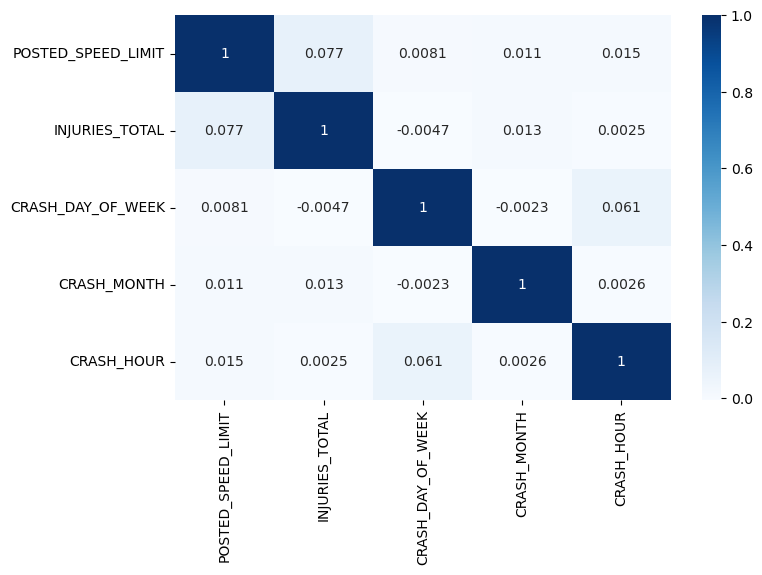

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(data=traffic_crash.corr(numeric_only=True),annot=True,cmap='Blues')

In [12]:
traffic_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785871 entries, 0 to 785870
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   POSTED_SPEED_LIMIT         785871 non-null  int64  
 1   WEATHER_CONDITION          785871 non-null  object 
 2   ROAD_LIGHTING_CONDITION    785871 non-null  object 
 3   ROADWAY_SURFACE_CONDITION  785871 non-null  object 
 4   CRASH_TYPE                 785871 non-null  object 
 5   INTERSECTION_RELATED_I     180041 non-null  object 
 6   DAMAGE                     785871 non-null  object 
 7   INJURIES_TOTAL             784147 non-null  float64
 8   PRIM_CONTRIBUTORY_CAUSE    785871 non-null  object 
 9   CRASH_DAY_OF_WEEK          785871 non-null  int64  
 10  CRASH_MONTH                785871 non-null  int64  
 11  CRASH_HOUR                 785871 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 71.9+ MB


# Identify and handle null values

In [13]:
#Checking the missing value in entire data
missing_values_In_Traffic_Data = traffic_crash.isna()
#Counting the missing values in each column
missing_values_In_Traffic_Data_counts = missing_values_In_Traffic_Data.sum()
missing_values_In_Traffic_Data_counts

POSTED_SPEED_LIMIT                0
WEATHER_CONDITION                 0
ROAD_LIGHTING_CONDITION           0
ROADWAY_SURFACE_CONDITION         0
CRASH_TYPE                        0
INTERSECTION_RELATED_I       605830
DAMAGE                            0
INJURIES_TOTAL                 1724
PRIM_CONTRIBUTORY_CAUSE           0
CRASH_DAY_OF_WEEK                 0
CRASH_MONTH                       0
CRASH_HOUR                        0
dtype: int64

In [14]:
##Handling missing values
traffic_crash['INTERSECTION_RELATED_I'].fillna('N', inplace=True)
traffic_crash['INJURIES_TOTAL'].fillna(0, inplace=True)

In [15]:
#Checking whether missing values are filled or not
missing_values_In_Traffic_Data = traffic_crash.isna()
missing_values_In_Traffic_Data_counts = missing_values_In_Traffic_Data.sum()
missing_values_In_Traffic_Data_counts

POSTED_SPEED_LIMIT           0
WEATHER_CONDITION            0
ROAD_LIGHTING_CONDITION      0
ROADWAY_SURFACE_CONDITION    0
CRASH_TYPE                   0
INTERSECTION_RELATED_I       0
DAMAGE                       0
INJURIES_TOTAL               0
PRIM_CONTRIBUTORY_CAUSE      0
CRASH_DAY_OF_WEEK            0
CRASH_MONTH                  0
CRASH_HOUR                   0
dtype: int64

# Visually displaying the COUNT of each variables.

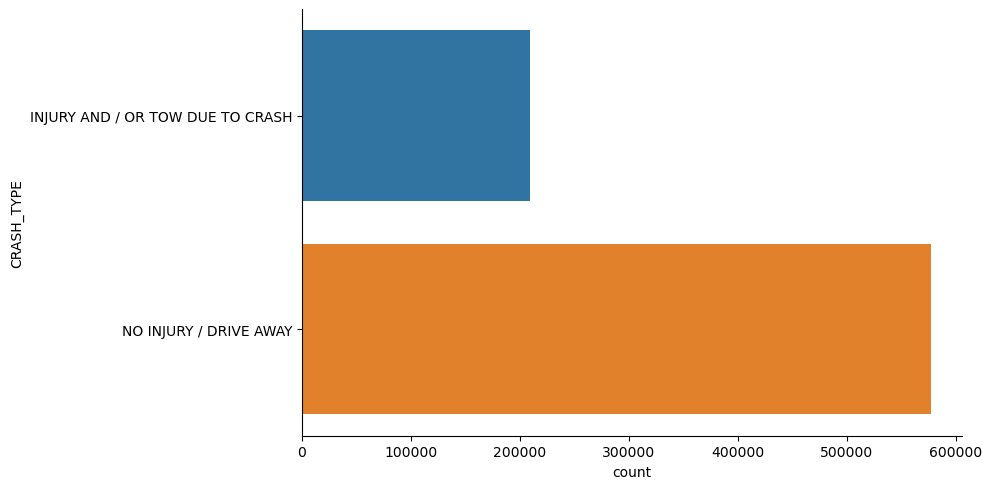

In [16]:
sns.catplot(data=traffic_crash,y='CRASH_TYPE',kind="count",aspect=2)

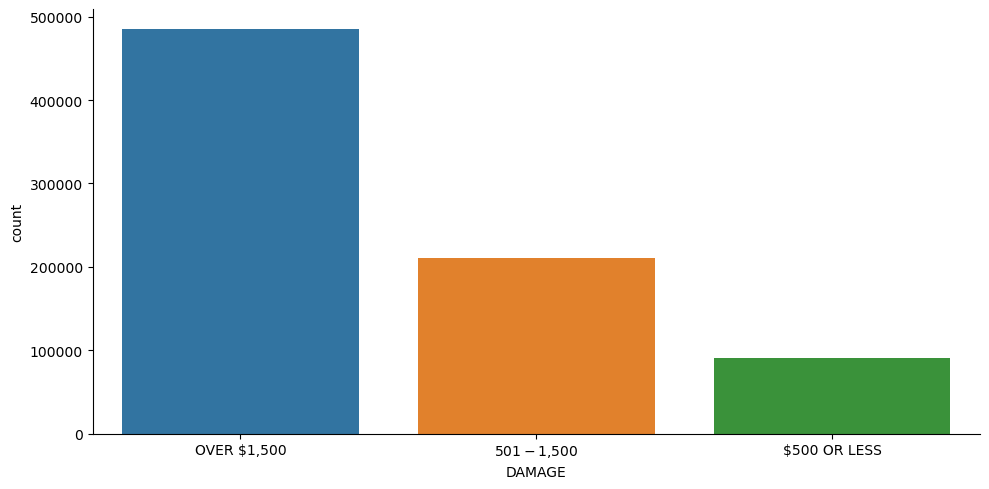

In [17]:
sns.catplot(data=traffic_crash, x='DAMAGE',kind="count",aspect=2)

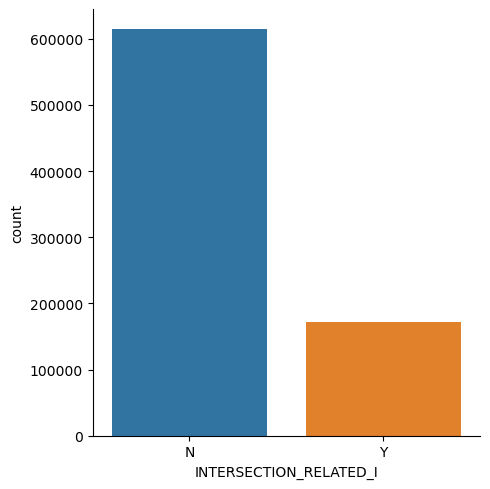

In [18]:
sns.catplot(data=traffic_crash, x='INTERSECTION_RELATED_I',kind="count")

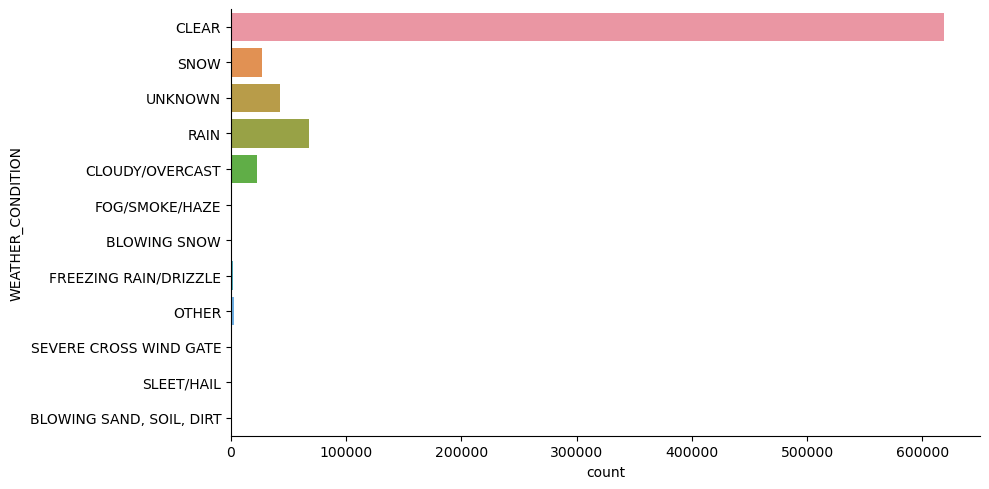

In [19]:
sns.catplot(data=traffic_crash, y="WEATHER_CONDITION", kind="count",aspect=2)

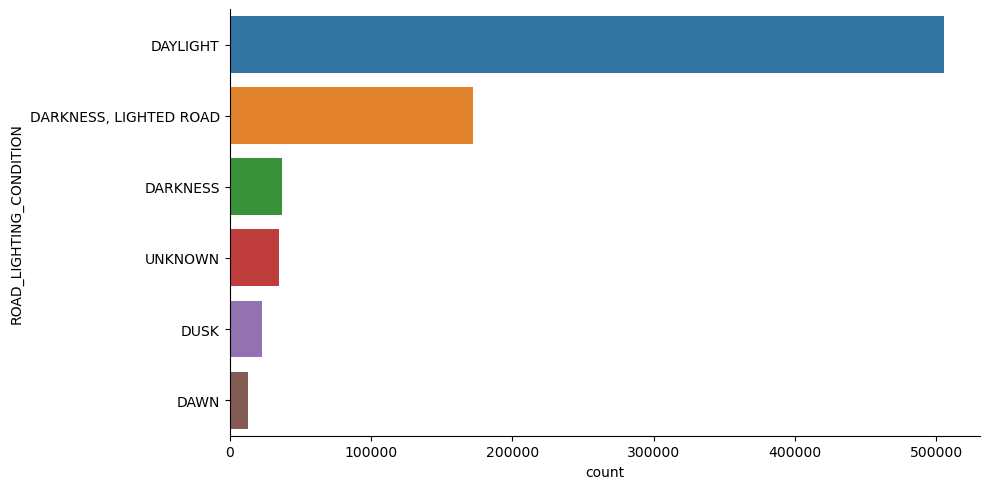

In [20]:
sns.catplot(data=traffic_crash, y="ROAD_LIGHTING_CONDITION", kind="count",aspect=2)

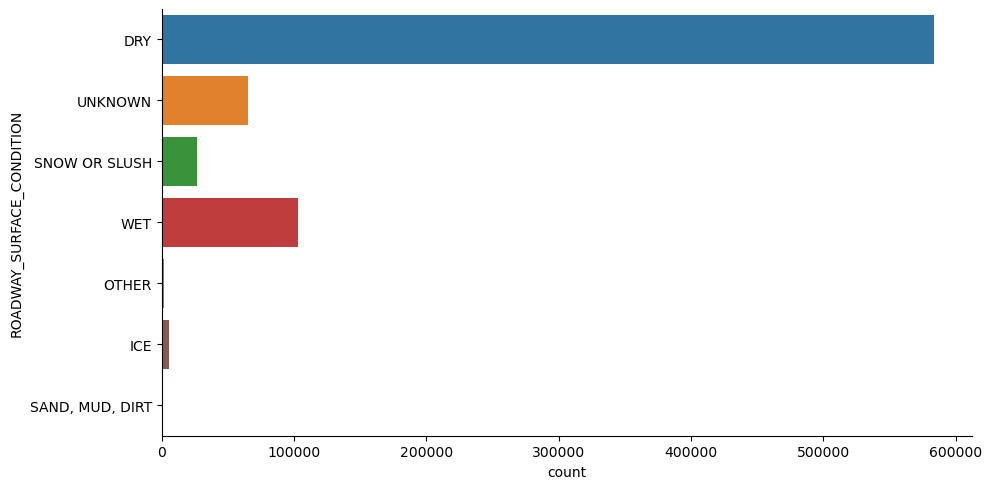

In [21]:
sns.catplot(data=traffic_crash,y="ROADWAY_SURFACE_CONDITION",kind="count",aspect=2)

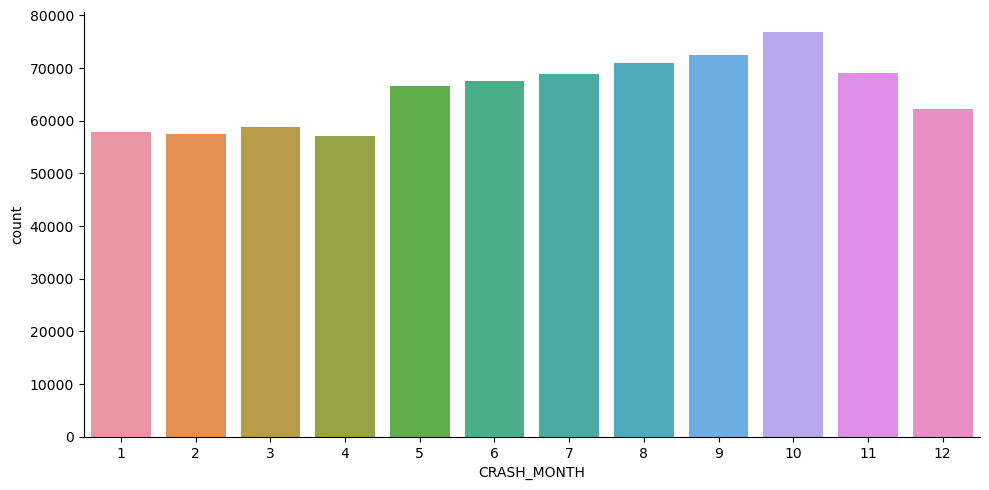

In [22]:
sns.catplot(data=traffic_crash, kind='count', x='CRASH_MONTH',aspect=2)

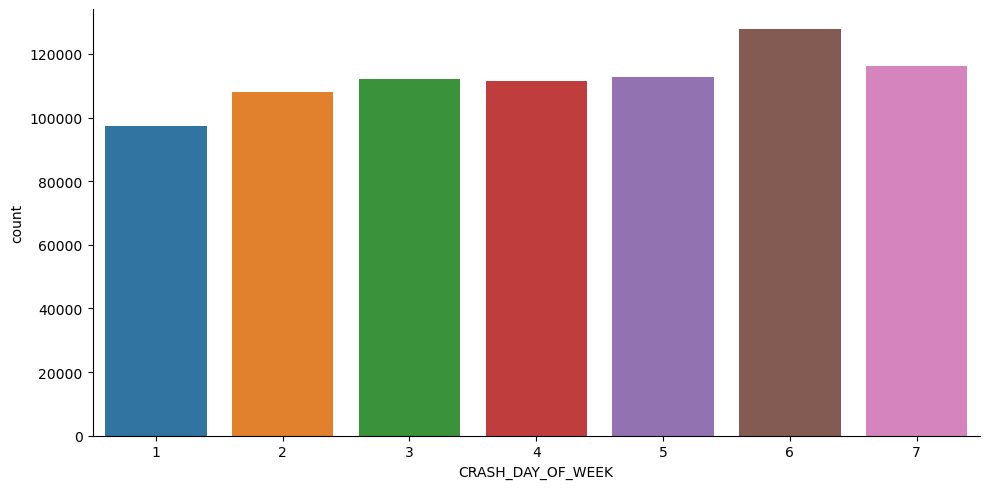

In [23]:
sns.catplot(data=traffic_crash, kind='count', x='CRASH_DAY_OF_WEEK',aspect=2)
###Sunday=1.

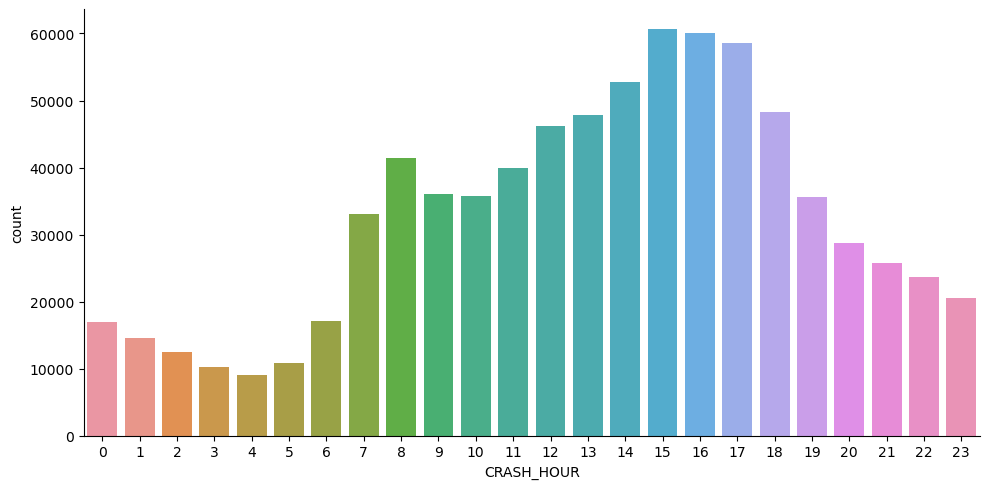

In [24]:
sns.catplot(data=traffic_crash, kind='count', x='CRASH_HOUR',aspect=2)


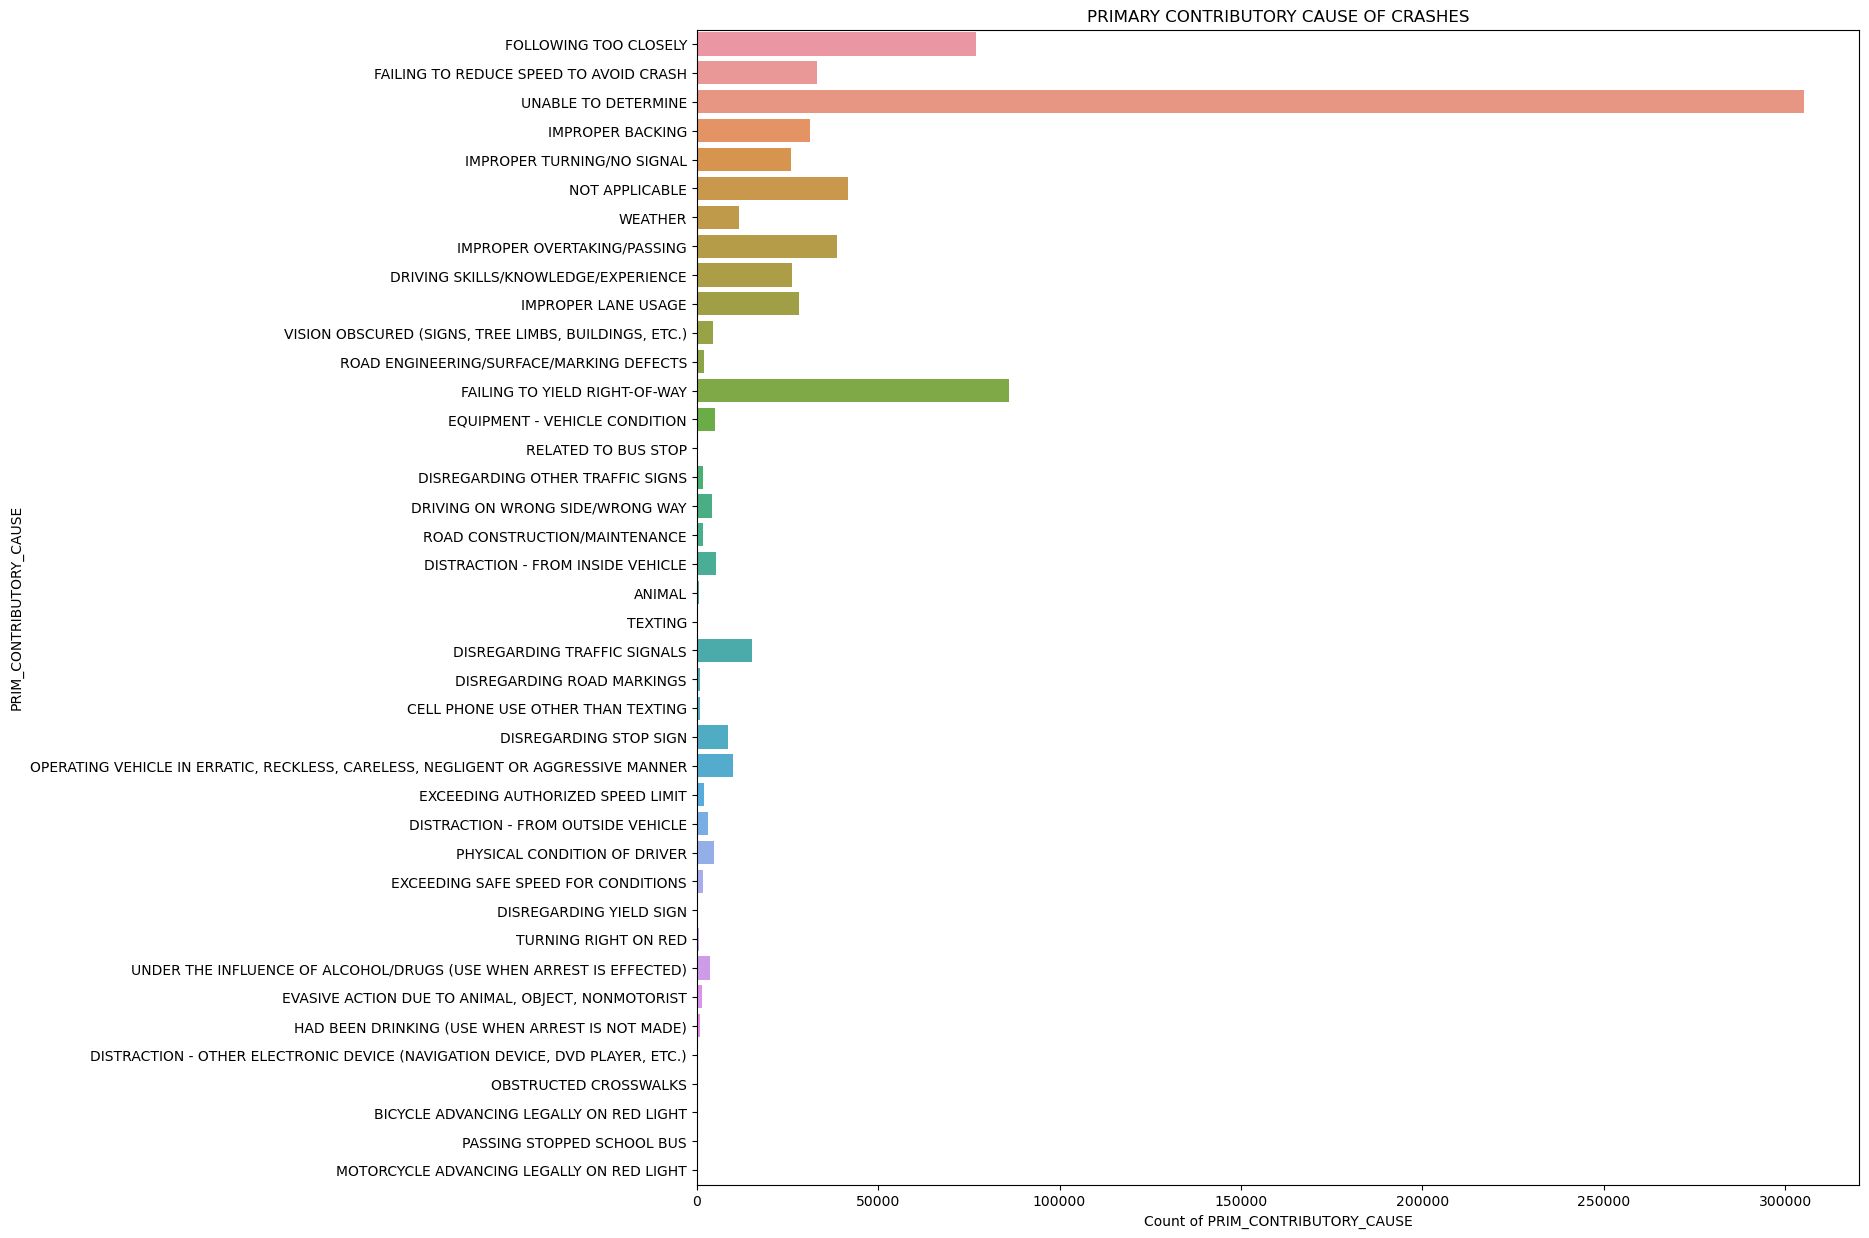

In [25]:
plt.figure(figsize=(15, 15))
sns.countplot(data=traffic_crash, y='PRIM_CONTRIBUTORY_CAUSE')
plt.title('PRIMARY CONTRIBUTORY CAUSE OF CRASHES')
plt.xlabel('Count of PRIM_CONTRIBUTORY_CAUSE')
plt.show()

# Handling outliers

<Figure size 600x600 with 0 Axes>

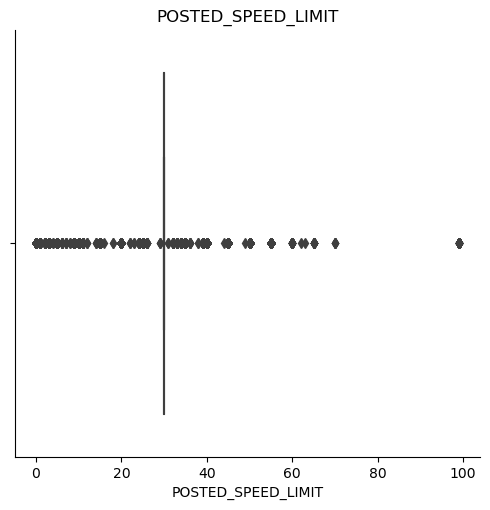

In [26]:
plt.figure(figsize=(6, 6))
sns.catplot(x='POSTED_SPEED_LIMIT',kind='box', data=traffic_crash)
plt.title('POSTED_SPEED_LIMIT')
plt.show()

In [27]:
## Above distinct value count for Posted speed limit shows that most of the traffic crash took place in between 15 to 35mph speed limit.
### As we know in general, Posted speed limit for Chicago(Illinois) is between 15-70mph so we are treating speed limit above 70 and below 15 as outliers.

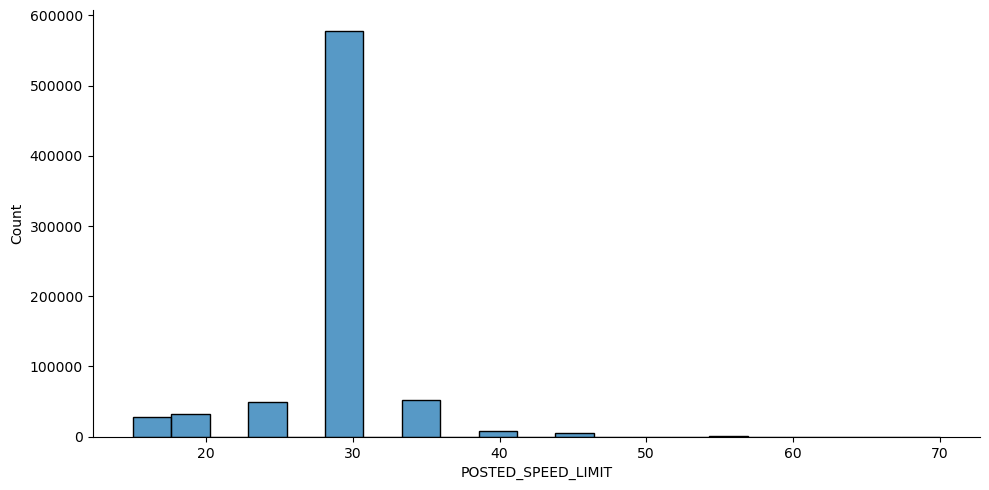

In [28]:
#Removing outliers
traffic_crash = traffic_crash[traffic_crash['POSTED_SPEED_LIMIT']<= 70]
traffic_crash = traffic_crash[traffic_crash['POSTED_SPEED_LIMIT']>= 15]
sns.displot(data=traffic_crash, kind='hist', x='POSTED_SPEED_LIMIT',aspect=2)

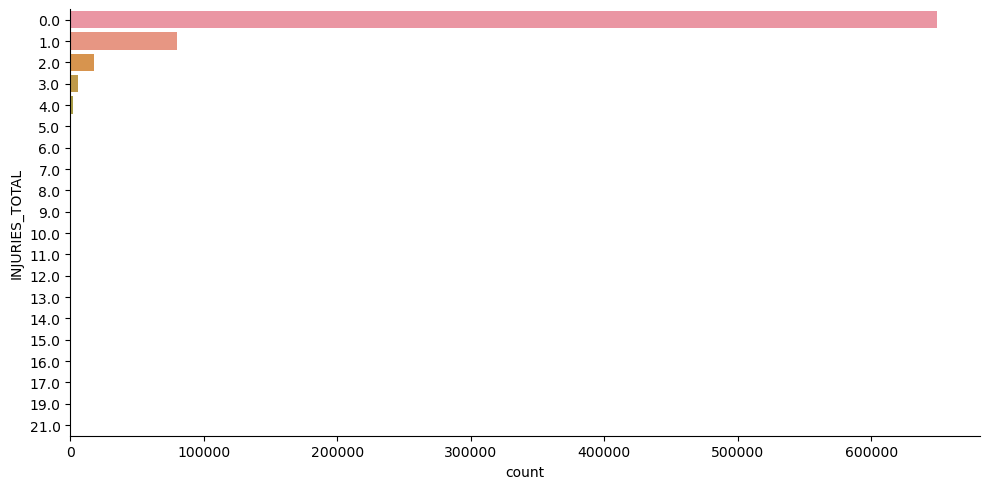

In [29]:
sns.catplot(data=traffic_crash, y="INJURIES_TOTAL", kind="count",aspect=2)

In [30]:
traffic_crash['INJURIES_TOTAL'].value_counts() 

INJURIES_TOTAL
0.0     648993
1.0      79757
2.0      17851
3.0       5414
4.0       1941
5.0        688
6.0        275
7.0        106
8.0         42
9.0         25
10.0        14
11.0         8
15.0         7
21.0         4
12.0         4
13.0         2
17.0         1
14.0         1
19.0         1
16.0         1
Name: count, dtype: int64

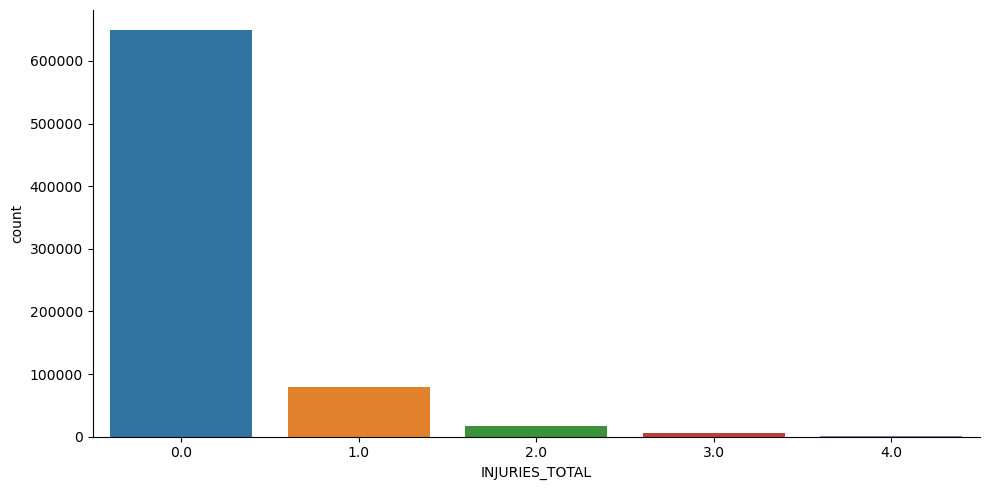

In [31]:
##Handling injuries_total outliers value.
traffic_crash = traffic_crash[traffic_crash['INJURIES_TOTAL']< 5]
sns.catplot(data=traffic_crash, kind='count', x='INJURIES_TOTAL',aspect=2)

# DATA ANALYSIS

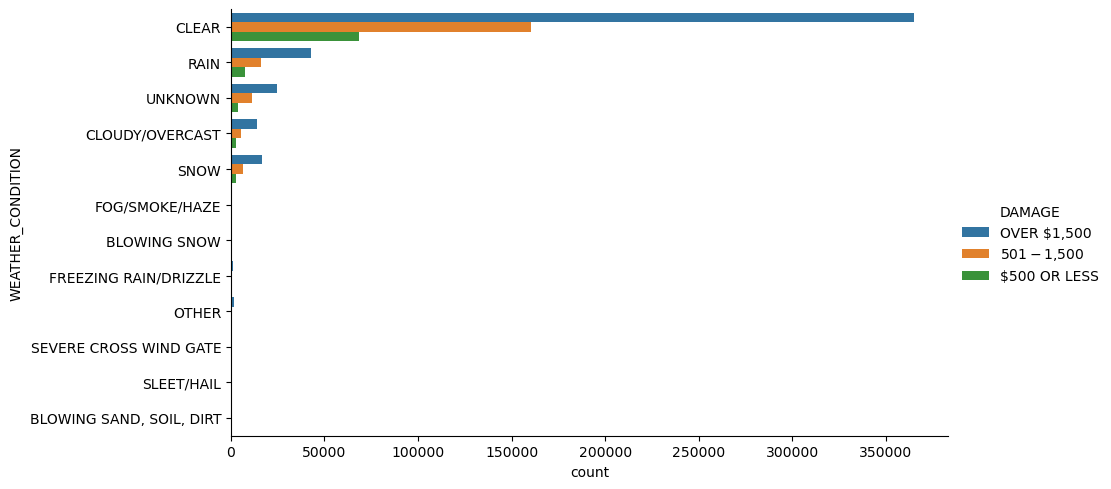

In [34]:
sns.catplot(data=traffic_crash, kind='count', y='WEATHER_CONDITION', hue='DAMAGE',height=5, aspect=2)

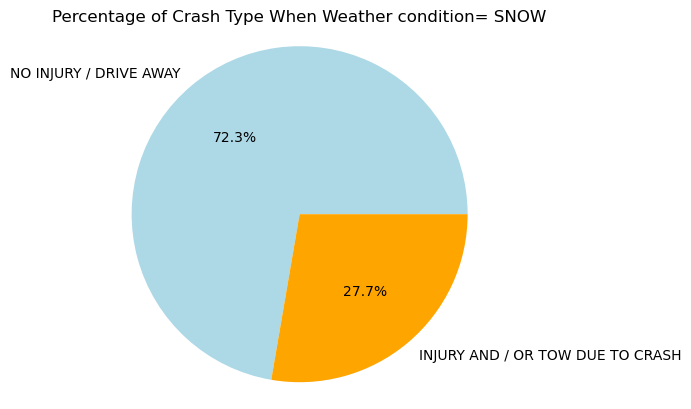

In [35]:
DF_Snow = traffic_crash.query('WEATHER_CONDITION== "SNOW"')

percentage_no_injury =(len(DF_Snow[DF_Snow['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY'])/len(DF_Snow) ) * 100
percentage_injury =(len(DF_Snow[DF_Snow['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH'])/len(DF_Snow) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['NO INJURY / DRIVE AWAY', 'INJURY AND / OR TOW DUE TO CRASH'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Crash Type When Weather condition= SNOW')
plt.show()

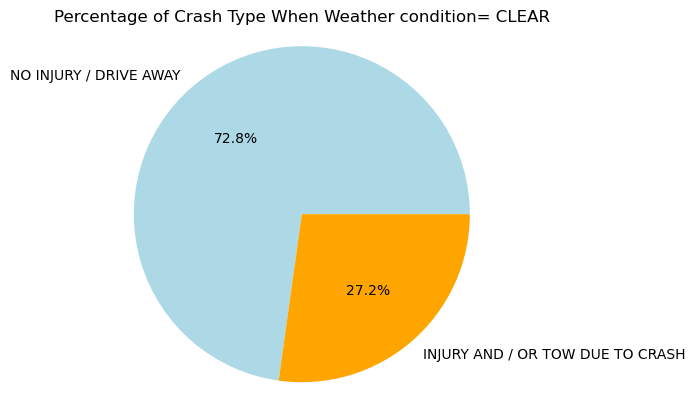

In [36]:
DF_Snow = traffic_crash.query('WEATHER_CONDITION== "CLEAR"')

percentage_no_injury =(len(DF_Snow[DF_Snow['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY'])/len(DF_Snow) ) * 100
percentage_injury =(len(DF_Snow[DF_Snow['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH'])/len(DF_Snow) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['NO INJURY / DRIVE AWAY', 'INJURY AND / OR TOW DUE TO CRASH'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Crash Type When Weather condition= CLEAR')
plt.show()

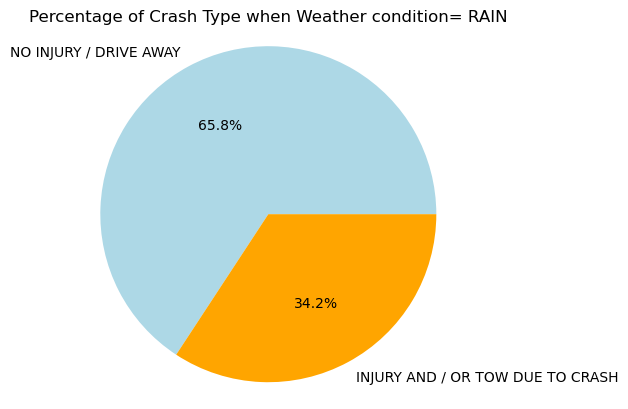

In [37]:
DF_Rain = traffic_crash.query('WEATHER_CONDITION== "RAIN"')

percentage_no_injury =(len(DF_Rain[DF_Rain['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY'])/len(DF_Rain) ) * 100
percentage_injury =(len(DF_Rain[DF_Rain['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH'])/len(DF_Rain) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['NO INJURY / DRIVE AWAY', 'INJURY AND / OR TOW DUE TO CRASH'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Crash Type when Weather condition= RAIN')
plt.show()

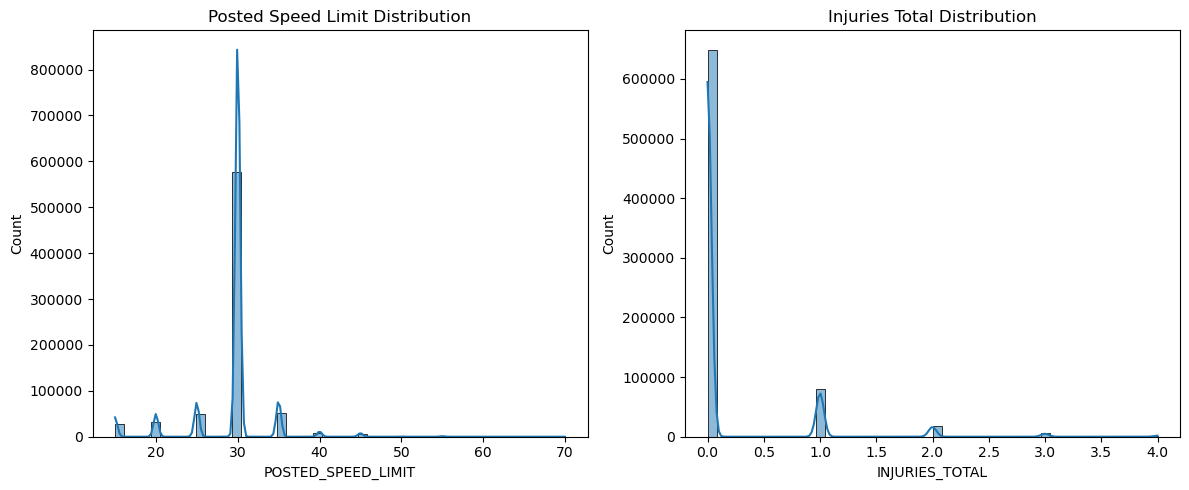

In [38]:
###Histogram of posted speed limit and injuries total
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(traffic_crash['POSTED_SPEED_LIMIT'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Posted Speed Limit Distribution')
sns.histplot(traffic_crash['INJURIES_TOTAL'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Injuries Total Distribution')
plt.tight_layout()
plt.show()


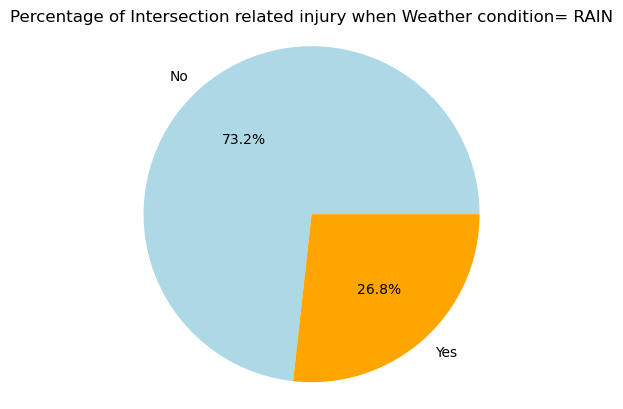

In [39]:
DF_Rain = traffic_crash.query('WEATHER_CONDITION== "RAIN"')

percentage_no_injury =(len(DF_Rain[DF_Rain['INTERSECTION_RELATED_I'] == 'N'])/len(DF_Rain) ) * 100
percentage_injury =(len(DF_Rain[DF_Rain['INTERSECTION_RELATED_I'] == 'Y'])/len(DF_Rain) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['No', 'Yes'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Intersection related injury when Weather condition= RAIN')
plt.show()

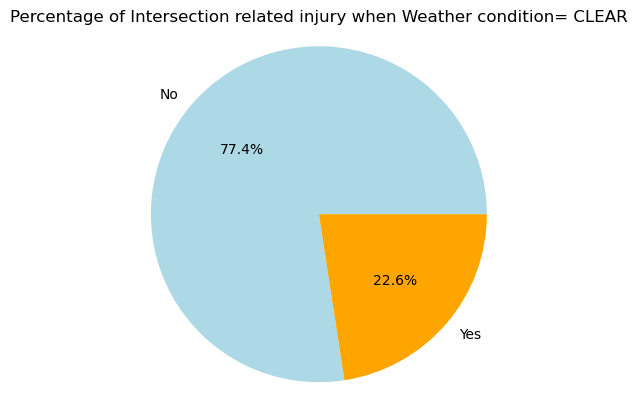

In [40]:
DF_Rain = traffic_crash.query('WEATHER_CONDITION== "CLEAR"')

percentage_no_injury =(len(DF_Rain[DF_Rain['INTERSECTION_RELATED_I'] == 'N'])/len(DF_Rain) ) * 100
percentage_injury =(len(DF_Rain[DF_Rain['INTERSECTION_RELATED_I'] == 'Y'])/len(DF_Rain) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['No', 'Yes'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Intersection related injury when Weather condition= CLEAR')
plt.show()

In [41]:
####Primary cause v/s crash type

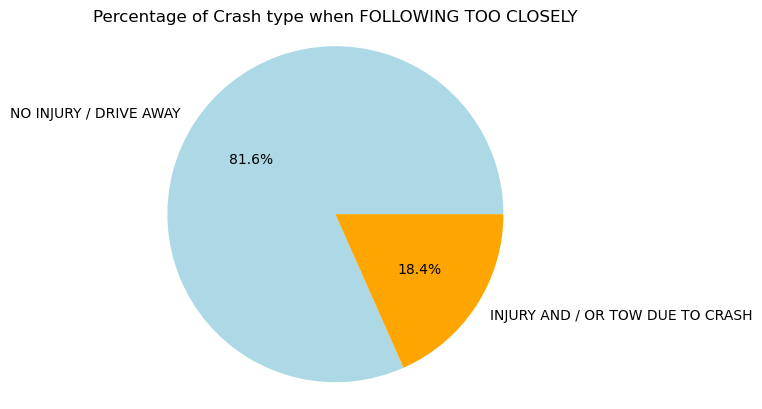

In [42]:
DF_Primarycause = traffic_crash.query('PRIM_CONTRIBUTORY_CAUSE== "FOLLOWING TOO CLOSELY"')

percentage_no_injury =(len(DF_Primarycause[DF_Primarycause['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY'])/len(DF_Primarycause) ) * 100
percentage_injury =(len(DF_Primarycause[DF_Primarycause['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH'])/len(DF_Primarycause) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['NO INJURY / DRIVE AWAY', 'INJURY AND / OR TOW DUE TO CRASH'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Crash type when FOLLOWING TOO CLOSELY')
plt.show()

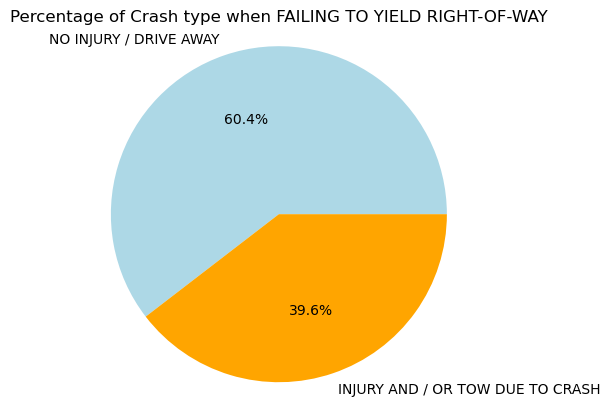

In [43]:
df_primarycause = traffic_crash.query('PRIM_CONTRIBUTORY_CAUSE== "FAILING TO YIELD RIGHT-OF-WAY"')

percentage_no_injury =(len(df_primarycause[df_primarycause['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY'])/len(df_primarycause) ) * 100
percentage_injury =(len(df_primarycause[df_primarycause['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH'])/len(df_primarycause) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['NO INJURY / DRIVE AWAY', 'INJURY AND / OR TOW DUE TO CRASH'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Crash type when FAILING TO YIELD RIGHT-OF-WAY')
plt.show()

In [44]:
### Percentage of intersection related injury based on primary cause of accident

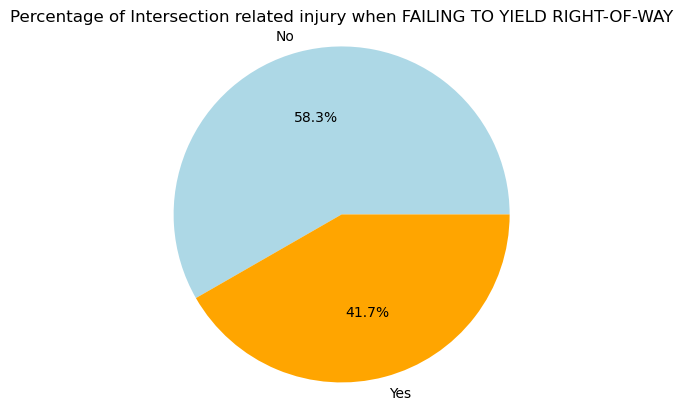

In [45]:
df_Primarycause = traffic_crash.query('PRIM_CONTRIBUTORY_CAUSE== "FAILING TO YIELD RIGHT-OF-WAY"')

percentage_no_injury =(len(df_Primarycause[df_Primarycause['INTERSECTION_RELATED_I'] == 'N'])/len(df_Primarycause) ) * 100
percentage_injury =(len(df_Primarycause[df_Primarycause['INTERSECTION_RELATED_I'] == 'Y'])/len(df_Primarycause) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['No', 'Yes'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Intersection related injury when FAILING TO YIELD RIGHT-OF-WAY')
plt.show()

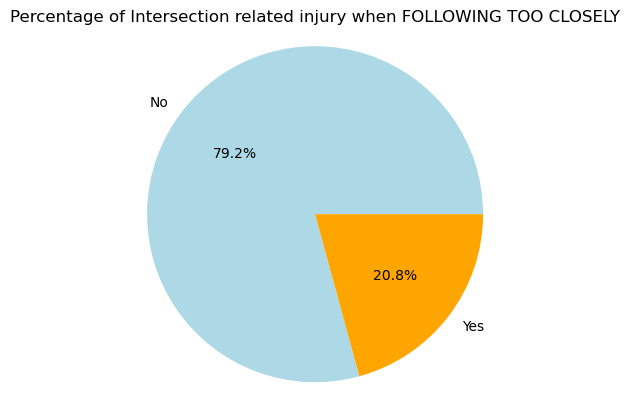

In [46]:
df_PrimaryCause = traffic_crash.query('PRIM_CONTRIBUTORY_CAUSE== "FOLLOWING TOO CLOSELY"')

percentage_no_injury =(len(df_PrimaryCause[df_PrimaryCause['INTERSECTION_RELATED_I'] == 'N'])/len(df_PrimaryCause) ) * 100
percentage_injury =(len(df_PrimaryCause[df_PrimaryCause['INTERSECTION_RELATED_I'] == 'Y'])/len(df_PrimaryCause) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['No', 'Yes'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Intersection related injury when FOLLOWING TOO CLOSELY')
plt.show()

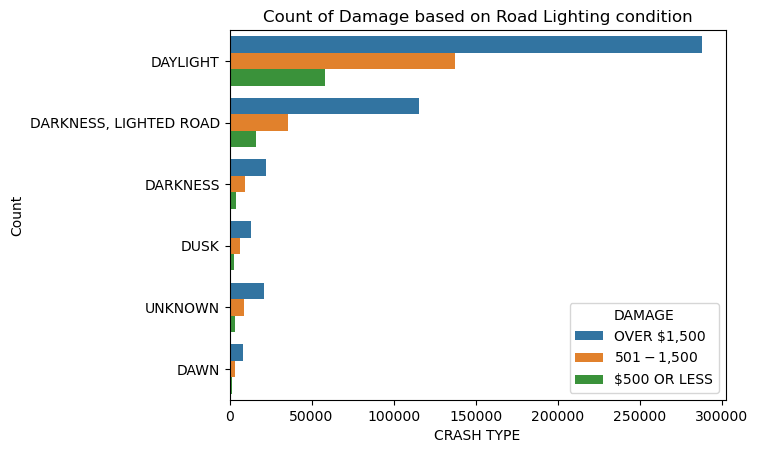

In [47]:
sns.countplot(data=traffic_crash, y='ROAD_LIGHTING_CONDITION', hue='DAMAGE')
plt.title('Count of Damage based on Road Lighting condition')
plt.xlabel('CRASH TYPE')
plt.ylabel('Count')
plt.show()

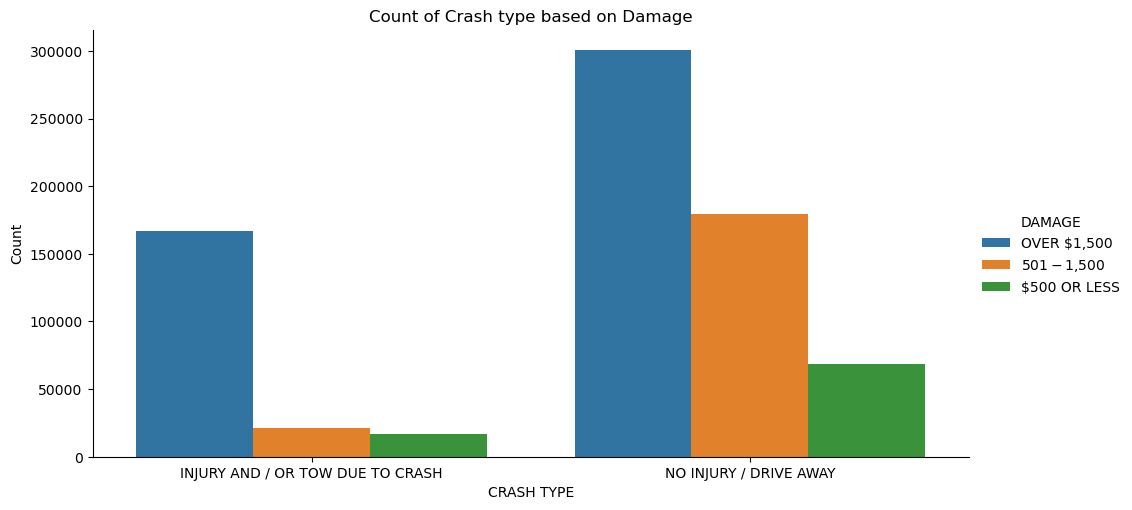

In [48]:
sns.catplot(data=traffic_crash, x='CRASH_TYPE', hue='DAMAGE',kind="count", aspect=2)
plt.title('Count of Crash type based on Damage')
plt.xlabel('CRASH TYPE')
plt.ylabel('Count')
plt.show()

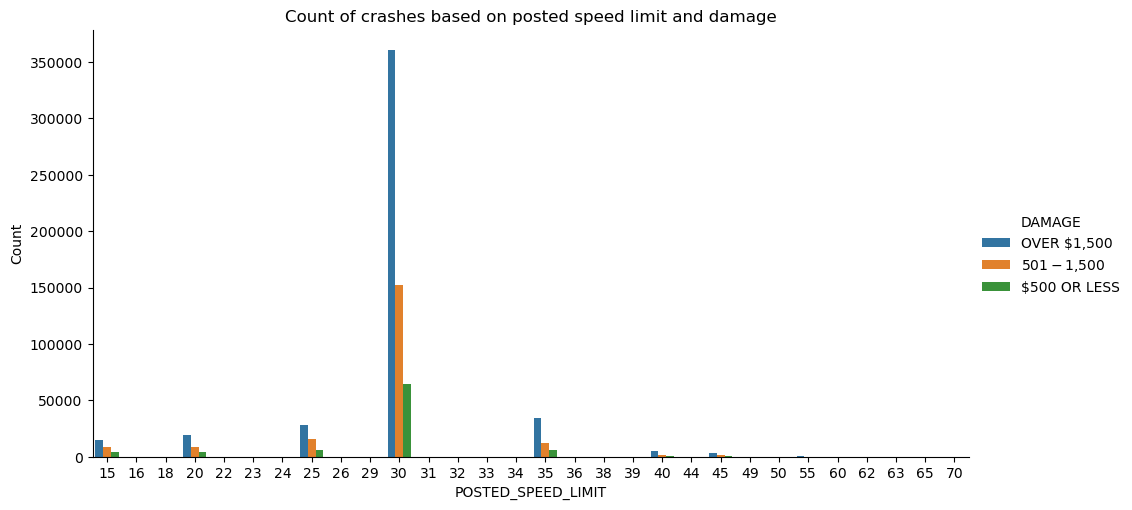

In [49]:
sns.catplot(data=traffic_crash, x='POSTED_SPEED_LIMIT', hue='DAMAGE',kind="count", aspect=2)
plt.title('Count of crashes based on posted speed limit and damage')
plt.xlabel('POSTED_SPEED_LIMIT')
plt.ylabel('Count')
plt.show()

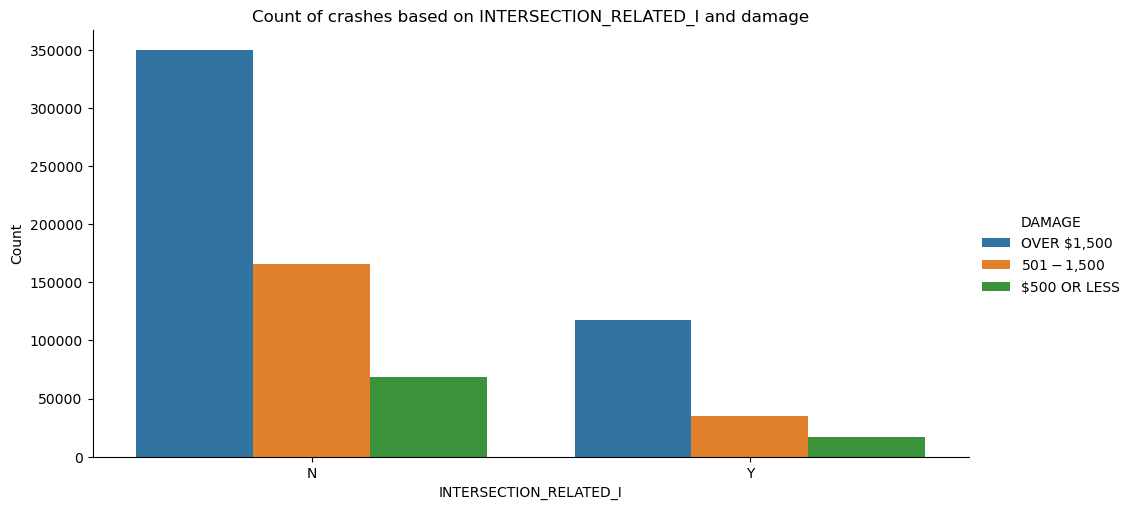

In [50]:
sns.catplot(data=traffic_crash, x='INTERSECTION_RELATED_I', hue='DAMAGE',kind="count", aspect=2)
plt.title('Count of crashes based on INTERSECTION_RELATED_I and damage')
plt.xlabel('INTERSECTION_RELATED_I')
plt.ylabel('Count')
plt.show()

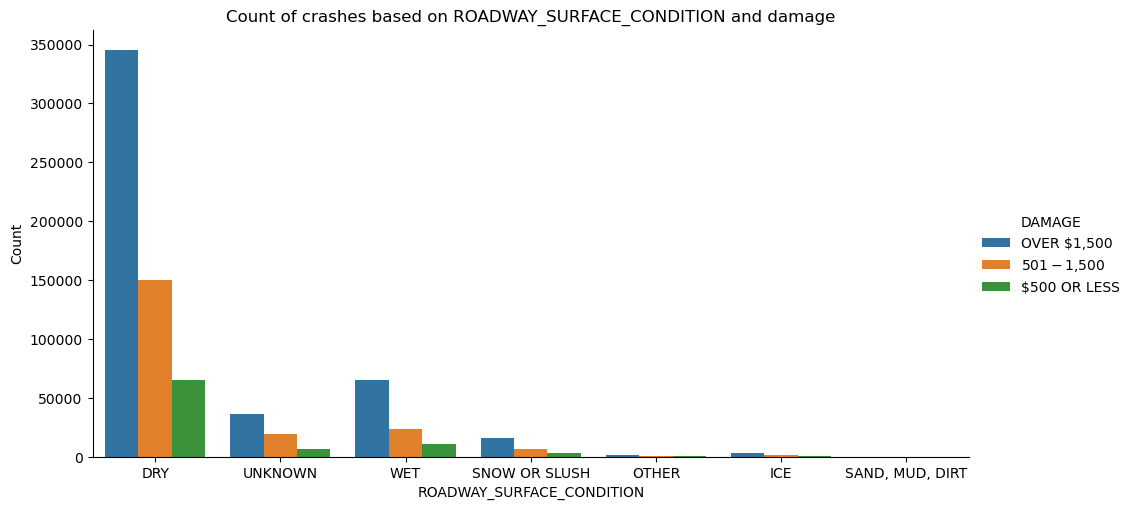

In [51]:
sns.catplot(data=traffic_crash, x='ROADWAY_SURFACE_CONDITION', hue='DAMAGE',kind="count", aspect=2)
plt.title('Count of crashes based on ROADWAY_SURFACE_CONDITION and damage')
plt.xlabel('ROADWAY_SURFACE_CONDITION')
plt.ylabel('Count')
plt.show()

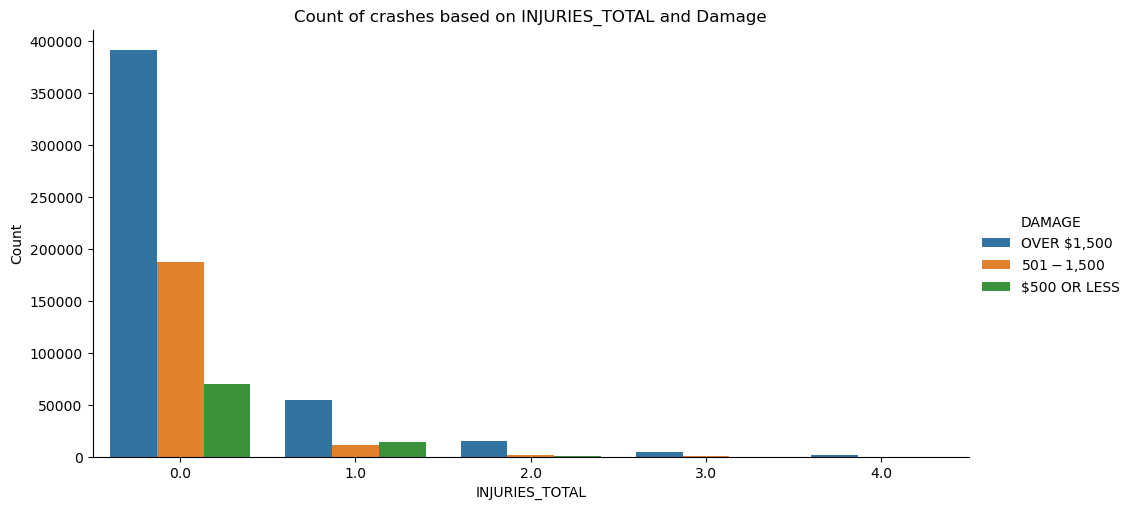

In [52]:
sns.catplot(data=traffic_crash, x='INJURIES_TOTAL', hue='DAMAGE',kind="count", aspect=2)
plt.title('Count of crashes based on INJURIES_TOTAL and Damage')
plt.xlabel('INJURIES_TOTAL')
plt.ylabel('Count')
plt.show()

In [53]:
###Traffic crash timing during snow weather.

Text(0.5, 1.0, 'Count of Crash Hour based on Weather condition = Snow')

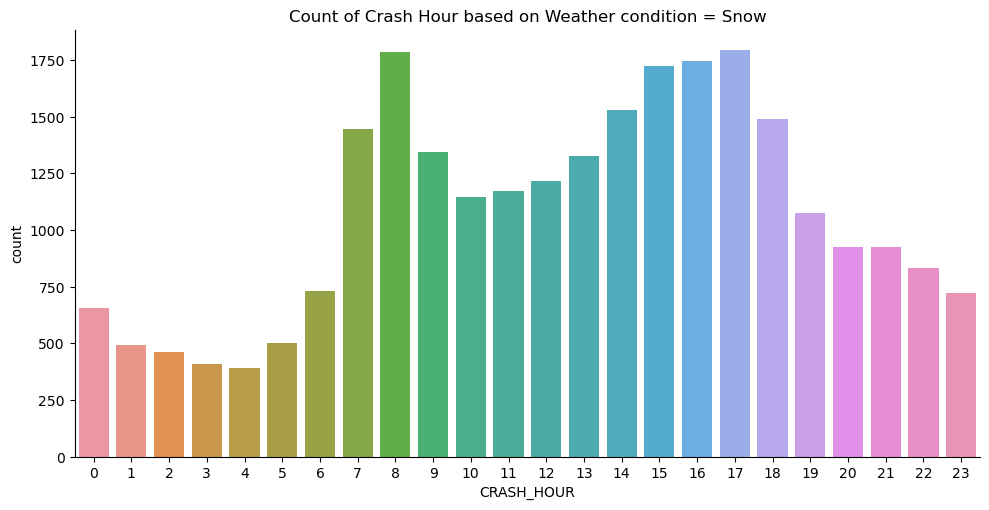

In [54]:
sns.catplot(data=traffic_crash.query('WEATHER_CONDITION== "SNOW"'), x="CRASH_HOUR", kind="count",aspect=2)
plt.title('Count of Crash Hour based on Weather condition = Snow')
##accident that took place due to snow is during 8am and 5pm most.

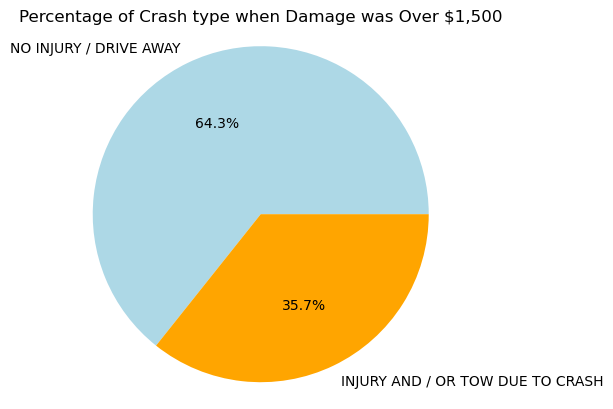

In [55]:
#######DAMAGE
DF_DamageHigh= traffic_crash.query('DAMAGE== "OVER $1,500"')

percentage_no_injury =(len(DF_DamageHigh[DF_DamageHigh['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY'])/len(DF_DamageHigh) ) * 100
percentage_injury =(len(DF_DamageHigh[DF_DamageHigh['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH'])/len(DF_DamageHigh) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['NO INJURY / DRIVE AWAY', 'INJURY AND / OR TOW DUE TO CRASH'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Crash type when Damage was Over $1,500')
plt.show()

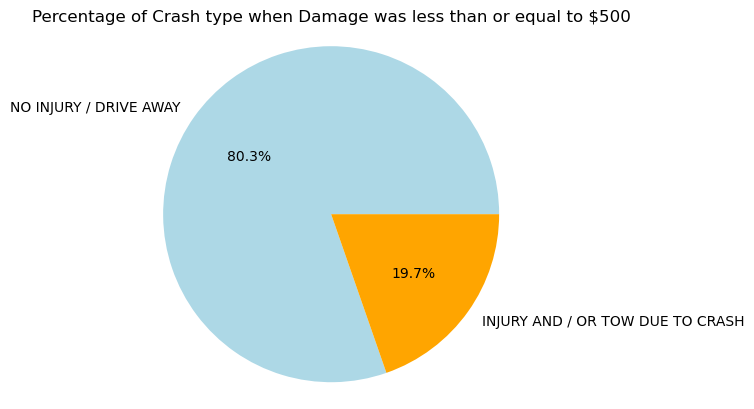

In [56]:
DF_DamageLess = traffic_crash.query('DAMAGE== "$500 OR LESS"')

percentage_no_injury =(len(DF_DamageLess[DF_DamageLess['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY'])/len(DF_DamageLess) ) * 100
percentage_injury =(len(DF_DamageLess[DF_DamageLess['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH'])/len(DF_DamageLess) ) * 100

plt.pie([percentage_no_injury, percentage_injury],labels=['NO INJURY / DRIVE AWAY', 'INJURY AND / OR TOW DUE TO CRASH'], colors=['lightblue','ORANGE'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Crash type when Damage was less than or equal to $500')
plt.show()

# Converting categorical input variables to dummy variables

In [57]:
traffic_crash = pd.get_dummies(traffic_crash, columns=['CRASH_TYPE','ROAD_LIGHTING_CONDITION','WEATHER_CONDITION','INTERSECTION_RELATED_I','PRIM_CONTRIBUTORY_CAUSE'])

In [58]:
traffic_crash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753956 entries, 0 to 785870
Data columns (total 69 columns):
 #   Column                                                                                                    Non-Null Count   Dtype  
---  ------                                                                                                    --------------   -----  
 0   POSTED_SPEED_LIMIT                                                                                        753956 non-null  int64  
 1   ROADWAY_SURFACE_CONDITION                                                                                 753956 non-null  object 
 2   DAMAGE                                                                                                    753956 non-null  object 
 3   INJURIES_TOTAL                                                                                            753956 non-null  float64
 4   CRASH_DAY_OF_WEEK                                                        

# KNN Model development 

In [59]:
x=traffic_crash[['POSTED_SPEED_LIMIT','WEATHER_CONDITION_RAIN','WEATHER_CONDITION_CLOUDY/OVERCAST','WEATHER_CONDITION_CLEAR','WEATHER_CONDITION_SNOW',
                 'WEATHER_CONDITION_FOG/SMOKE/HAZE','ROAD_LIGHTING_CONDITION_DARKNESS','ROAD_LIGHTING_CONDITION_DAYLIGHT','CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH'
                 ,'CRASH_TYPE_NO INJURY / DRIVE AWAY','INTERSECTION_RELATED_I_N','INTERSECTION_RELATED_I_Y','INJURIES_TOTAL','CRASH_DAY_OF_WEEK',
                 'CRASH_MONTH','CRASH_HOUR','PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY','PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY']].to_numpy()
y=traffic_crash['DAMAGE'].to_numpy()

#### only keeping selected dummy variables of primary contributory cause, roadway surface condition because rest variables doesn't have enough data in it.

In [60]:
#Step1: Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=35)

In [61]:
#Step2: #Standardized data to same scale
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
x_standardized =standardizer.fit_transform(x_train)
x_test_std = standardizer.fit_transform(x_test)

In [62]:
##Step 3: Create model (fit the training data)
from sklearn.neighbors import KNeighborsClassifier
#We will assess results with different values of k.
knn = KNeighborsClassifier(n_neighbors=11).fit(x_train, y_train)

In [63]:
##Step 4: USing model to predict the class of test data
y_predicted= knn.predict(x_test_std)
y_predicted

array(['OVER $1,500', 'OVER $1,500', 'OVER $1,500', ..., 'OVER $1,500',
       'OVER $1,500', 'OVER $1,500'], dtype=object)

In [64]:
#Model Evaluation
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
# Calculate & display metrics using weighted
print(accuracy_score(y_test, y_predicted))
print(precision_score(y_test, y_predicted, average = 'weighted'))
print(recall_score(y_test, y_predicted, average = 'weighted'))
print(f1_score(y_test, y_predicted, average = 'weighted'))

0.6149292399651616
0.4790879413871278
0.6149292399651616
0.4851533241430229


In [60]:
# Calculate & display metrics using macro
print(accuracy_score(y_test, y_predicted))
print(precision_score(y_test, y_predicted, average = 'macro'))
print(recall_score(y_test, y_predicted, average = 'macro'))
print(f1_score(y_test, y_predicted, average = 'macro'))

0.6149292399651616
0.3379275729970755
0.33569901239145006
0.27031781551772577


In [62]:
values, counts = np.unique(y_predicted, return_counts=True)
print(values, counts)

['$500 OR LESS' '$501 - $1,500' 'OVER $1,500'] [    28   5094 221065]


In [63]:
#Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix

array([[     2,    662,  25012],
       [     7,   1633,  58599],
       [    19,   2799, 137454]], dtype=int64)

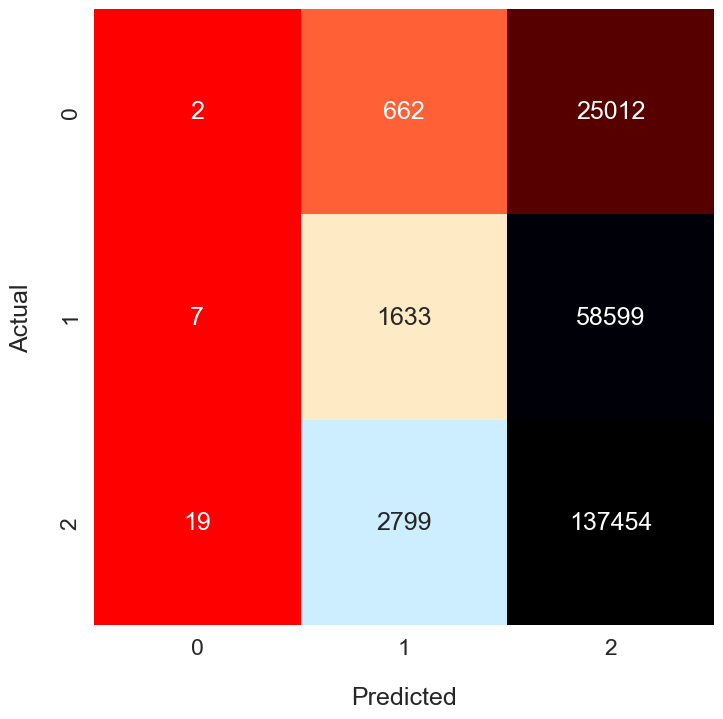

In [64]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)
ax = sns.heatmap(
conf_matrix, # confusion matrix 2D array
annot=True, # show numbers in the cells
fmt='d', # show numbers as integers
cbar=False, # don't show the color bar
cmap='flag', # customize color map
#vmax=175 # to get better color contrast
)
ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

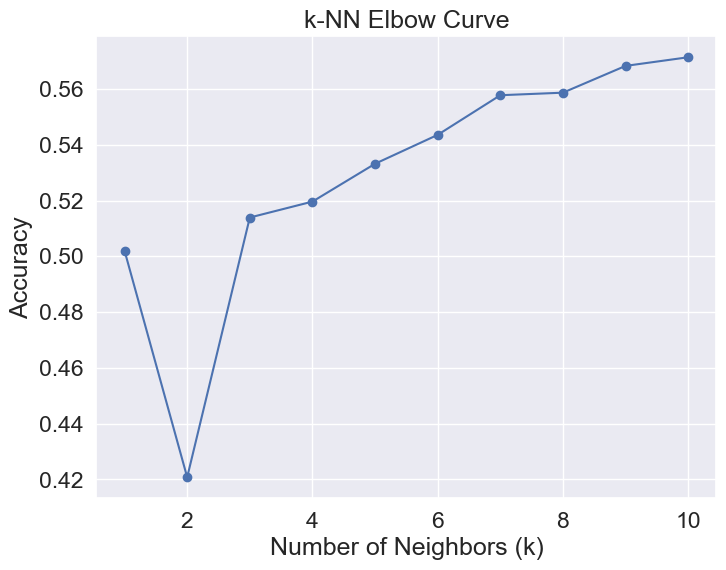

In [65]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Initialize lists to store values of k and their corresponding accuracies
k_values = list(range(1, 11))
accuracies = []

# Create an elbow curve by training k-NN models for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    accuracies.append(accuracy)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Elbow Curve')
plt.grid(True)
plt.show()